<a href="https://colab.research.google.com/github/basawanayya/deep-learning/blob/master/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import tensorflow as tf

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt


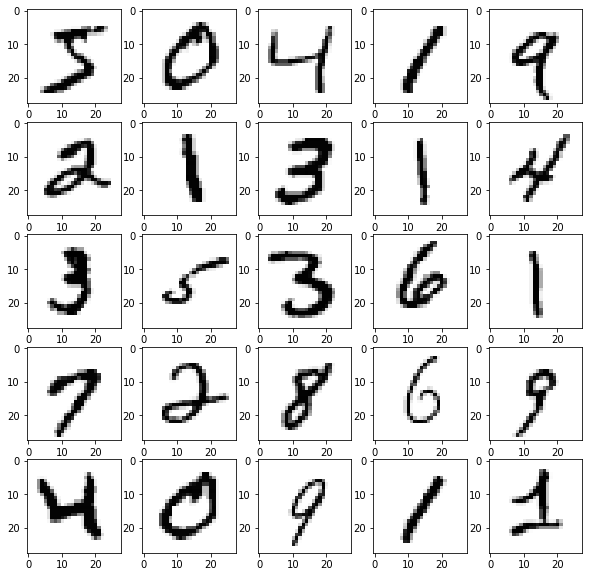

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.figure (figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap='Greys')
plt.show()



5


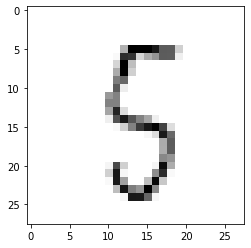

In [0]:
image_index = 35100 
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [0]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [0]:
model = tf.keras.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu' , input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                7

In [0]:
model.fit(x_train, y_train, epochs=10,
          validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 52s 861us/sample - loss: 0.2093 - acc: 0.9519 - val_loss: 0.0709 - val_acc: 0.9775
Epoch 2/10
60000/60000 [==============================] - 51s 849us/sample - loss: 0.0561 - acc: 0.9833 - val_loss: 0.0626 - val_acc: 0.9810
Epoch 3/10
60000/60000 [==============================] - 53s 880us/sample - loss: 0.0468 - acc: 0.9860 - val_loss: 0.0471 - val_acc: 0.9851
Epoch 4/10
60000/60000 [==============================] - 53s 878us/sample - loss: 0.0380 - acc: 0.9880 - val_loss: 0.0397 - val_acc: 0.9887
Epoch 5/10
60000/60000 [==============================] - 53s 881us/sample - loss: 0.0354 - acc: 0.9898 - val_loss: 0.0424 - val_acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 54s 904us/sample - loss: 0.0276 - acc: 0.9921 - val_loss: 0.0505 - val_acc: 0.9872
Epoch 7/10
60000/60000 [==============================] - 55s 910us/sample - loss: 0.0240 - acc: 0.9929 